## By DOA IBU

## Overview
### Data Visualization is needed to see the characteristics from the entire dataset before modelling 

Short summary from this dataset,
*The target variable(y) is DELQ_FLG.
*There are Numerical and Categorical Variables

In case, we should Visualize the importance which aiming to the target Variable to get the pattern

### Visualization Method.
1. Numerical   ==> Histogram, Violinplot, boxplot
2. Categorical ==> Barchat, Stacked Barplot, Pie Chart

### Model Interpretation
1. Determine the Feature Importance from XGboost Model
2. Make Partial Dependence Plot for the first six importance feature

# Import Data

In [228]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.cross_validation import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
clean_dataset=pd.read_csv('CLEAN DATASET.csv', encoding='ISO-8859-1')
data=clean_dataset
data=data.drop(['bank_id'],1)
data.head()

,AGE,MARITAL_STATUS,GENDER,EDUCATION,STATE,OCC_DESC,CUST_SEGMENT,DEPENDENT_CNT,SA_AVG_BAL,SA_CNT,...,POSTPAID_TXN_AMT_TOTAL_TELCO,POSTPAID_TXN_CNT_TOTAL_TELCO,TXN_AMT_TOTAL_TRANS,TXN_CNT_TOTAL_TRANS,TXN_AMT_TOTAL_ECO,TXN_CNT_TOTAL_ECO,TXN_AMT_TOTAL_TRAVEL,TXN_CNT_TOTAL_TRAVEL,CNT_MOBILE_PHONE,DELQ_FLG
0,60,Married,Female,College/ University,Selangor Darul Ehsan,EXECUTIVE AND ABOVE,MASS,3.0,9173.183000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,59,Married,Male,College/ University,Selangor Darul Ehsan,NON-EXECUTIVE,MASS,2.0,37493.185161,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59,Single,Male,No Formal Education / Unknown,Selangor Darul Ehsan,OTHERS,MASS,0.0,1838.228571,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,59,Married,Male,No Formal Education / Unknown,Selangor Darul Ehsan,NON-EXECUTIVE,MASS,0.0,961.719643,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59,Married,Male,No Formal Education / Unknown,Sarawak,EXECUTIVE AND ABOVE,MASS,0.0,4461.273214,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split Numerical and Categorical Variables

In [230]:
data['DELQ_FLG'][data['DELQ_FLG']==1]='Delinquent'
data['DELQ_FLG'][data['DELQ_FLG']==0]='No Delinquent'

kategorik=['MARITAL_STATUS','GENDER','EDUCATION','STATE','OCC_DESC','CUST_SEGMENT','DELQ_FLG']
kategorik=data[kategorik]
numerik=data.drop(kategorik,1)
#kategorik.info()
kategorik.head()

,MARITAL_STATUS,GENDER,EDUCATION,STATE,OCC_DESC,CUST_SEGMENT,DELQ_FLG
0,Married,Female,College/ University,Selangor Darul Ehsan,EXECUTIVE AND ABOVE,MASS,No Delinquent
1,Married,Male,College/ University,Selangor Darul Ehsan,NON-EXECUTIVE,MASS,No Delinquent
2,Single,Male,No Formal Education / Unknown,Selangor Darul Ehsan,OTHERS,MASS,No Delinquent
3,Married,Male,No Formal Education / Unknown,Selangor Darul Ehsan,NON-EXECUTIVE,MASS,No Delinquent
4,Married,Male,No Formal Education / Unknown,Sarawak,EXECUTIVE AND ABOVE,MASS,No Delinquent


In [188]:
data.head()
viz=numerik
f=plt.figure(figsize=(10,10))
#sns.boxplot( data=viz)
#sns.boxplot(data=viz.iloc[:,60:66], orient='h', color='red')
#sns.violinplot(data=viz.iloc[:,0:5], orient='h', color='RED')

# MISSING VALUE VISUALIZATION

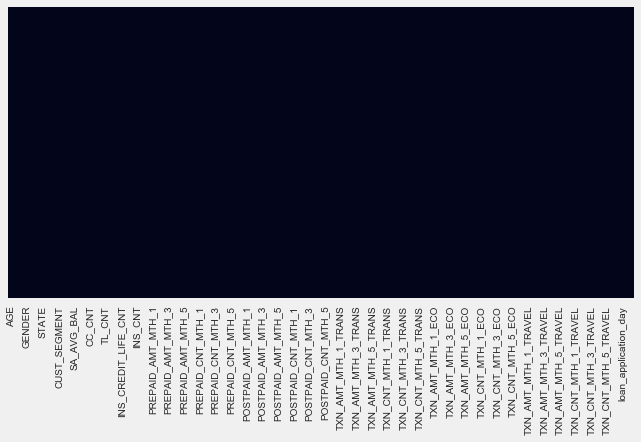

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
# Seeing the map of NaN
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

# Correlation Plot for Numerical Variables

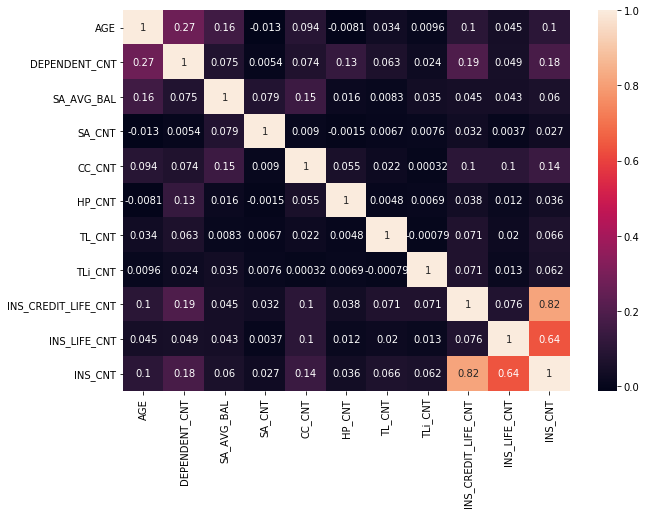

In [22]:
#Next step, we should choose numerical data first
plt.figure(figsize=(10,7))
sns.heatmap(numerik.iloc[:,0:11].corr(),annot=True)

# Pie Chart for DLEQ_FLG to see the proportion of the target variable

Text(0.5,1,'Pie Chart Variable DLEQ_FLG')

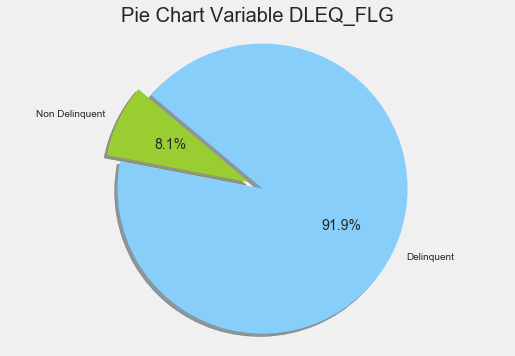

In [185]:
# Data to plot
labels = ['Non Delinquent', 'Delinquent']
sizes = [len(data[data['DELQ_FLG']=='Y']),len(data[data['DELQ_FLG']=='N'])]
colors = ['yellowgreen','lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.legend(labels, loc="best")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Pie Chart Variable DLEQ_FLG',size=20)


From the entire data, absolutely we always have the target variable. That variable is variable 'DELQ_FLG'. This variable represented the indicator for whether or not customer was delinquent in their payment. This variable contains 'Y' that represented the customer was delinquent in their paymennt, and contain 'N' that represented the customer was not delinquent in their payment. From the Pie Chart, we know that there is a lot of customers was delinquent in their payment. In that case, there is Imbalanced problem caused by the gap-proportion between 'Y' and 'N' and it will give big effect to our model if we dont do the traetment for this problem  

# Boxplot for Age and the comparison with DELQ_FLG

Text(0,0.5,'DELQ_FLG')

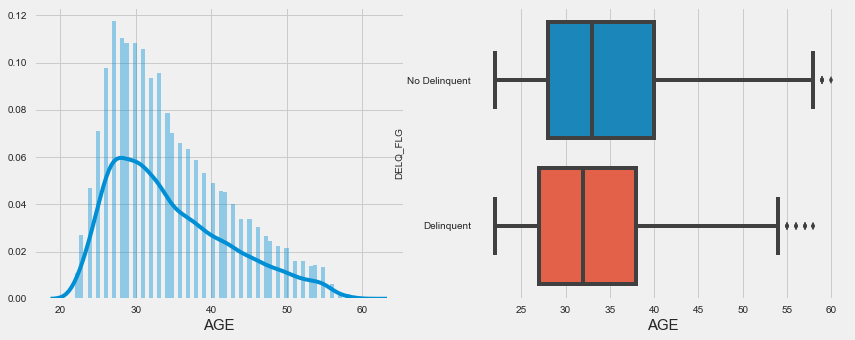

In [194]:
f=plt.figure(figsize=(13,5))
# Distribution off Age
f.add_subplot(1,2,1)
a=sns.distplot(viz.AGE, bins=70)
a.set_xlabel("AGE", fontsize=15)
f.add_subplot(1,2,2)
# Boxplot for 'age'
g = sns.boxplot(x=viz["AGE"], y=kategorik['DELQ_FLG'])
g.set_xlabel("AGE", fontsize=15)
g.set_ylabel('DELQ_FLG',fontsize=10)
# Set theme
#.add_subplot(1,3,3)
#sns.set_style('whitegrid')
## Violin plot
#h=sns.violinplot(x='AGE', y=kategorik['DELQ_FLG'], data=viz)
#h.set_xlabel("AGE", fontsize=20)
#h.set_ylabel('DELQ_FLG',fontsize=10)

Now, we want to see the descriptive summary from variable 'AGE'. From the histogram, we get the information that the age distribution from CIMB's Customer is about 20 to 60. Lot of customers in CIMB around 25 to 40 years old. From the boxplot that overlay variable 'DELQ_FLG', seems like there is no siginificants age mean difference from each Flag.  

# Interaction Boxplot among Marital_Status, DELQ_FLG, and Age

Text(0.5,0,'MARITAL_STATUS')

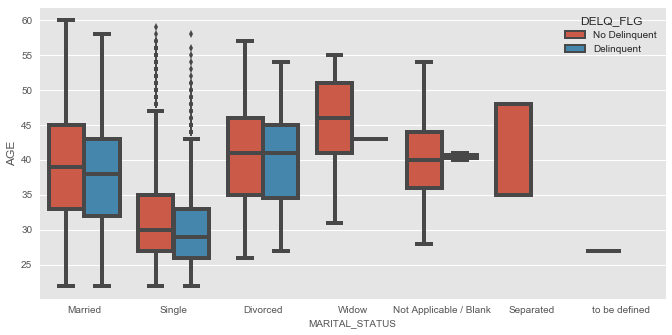

In [195]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
g = sns.boxplot(y=data["AGE"], hue=data['DELQ_FLG'], x=data['MARITAL_STATUS'])
plt.xlabel('MARITAL_STATUS',fontsize=10)

Now, we want to see how the interaction of age and marital status of customers based on variable 'DELQ_FLG'. After we get the boxplot, we get that the customers who has Married, Single, and Divorced have the big change to late on their payment, which mean labeled as delinquent on their payment.





Text(0.5,1,'Barchart for Cust Segment')

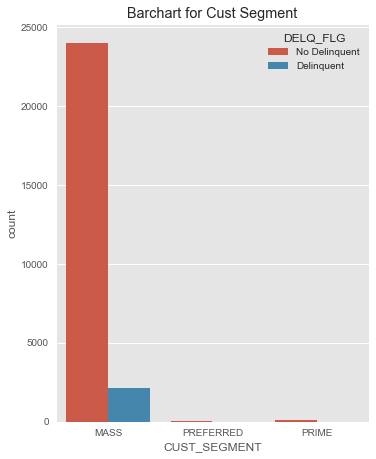

In [196]:
f=plt.figure(figsize=(5,15))
# Count Plot (a.k.a. Bar Plot)
f.add_subplot(2,1,1)
sns.countplot(x='CUST_SEGMENT',hue='DELQ_FLG', data=kategorik) 
# Rotate x-labels
plt.xticks(rotation=0)
plt.title('Barchart for Cust Segment')


Cust Segment is Customer's wealth segment, in order from normal to well off (Mass, Prime, Preferred). mostly of CIMB'S Customer are in MASS Segment or it can say normal condition. And mostly, they are labeled as 'N', means they were no delinquent on their payment.

Text(0.5,0,'CUST_SEGMENT')

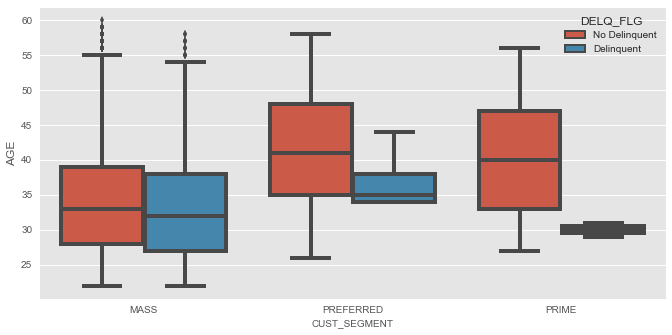

In [197]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
g = sns.boxplot(y=data["AGE"], hue=data['DELQ_FLG'], x=data['CUST_SEGMENT'])
plt.xlabel('CUST_SEGMENT',fontsize=10)

After we see the numbers of customer from each their Segment, now we want to see how the interactions from AGE and CUST_SEGMENT based on DELQ_FLG. From the interaction-boxplot, we can see the pattern that the higher their segment, the lower chance to late on their payment.

In [167]:
data.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26315 entries, 0 to 26314
Columns: 113 entries, AGE to DELQ_FLG
dtypes: float64(97), int64(10), object(6)
memory usage: 24.1+ MB


# Categorical Treatment

# Stacked Barplot

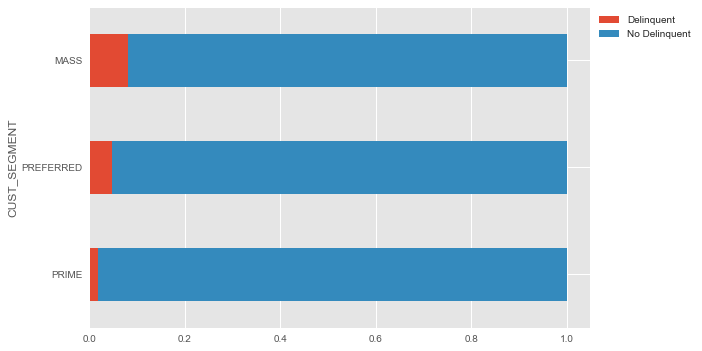

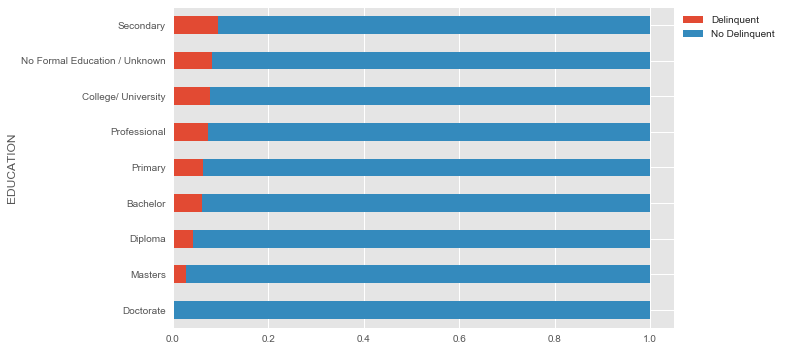

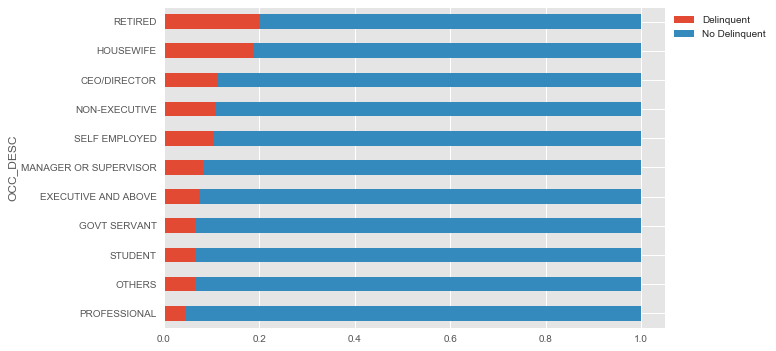

In [200]:
Education = pd.crosstab(data['EDUCATION'],data['DELQ_FLG'], normalize=0)  
Occupation = pd.crosstab(data['OCC_DESC'],data['DELQ_FLG'], normalize=0)
Marital_Status = pd.crosstab(data['MARITAL_STATUS'],data['DELQ_FLG'], normalize=0)
State = pd.crosstab(data['STATE'],data['DELQ_FLG'], normalize=0)
Cust_Segment = pd.crosstab(data['CUST_SEGMENT'],data['DELQ_FLG'], normalize=0)

#loan_application_month.sort_values(by='Y',inplace=True)
Cust_Segment.sort_values(by='Delinquent',inplace=True)
Education.sort_values(by='Delinquent',inplace=True)
Occupation.sort_values(by='Delinquent',inplace=True)
Marital_Status.sort_values(by='Delinquent',inplace=True)
State.sort_values(by='Delinquent',inplace=True)




Cust_Segment.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#State.plot(kind='barh',stacked=True)
#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

Education.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

Occupation.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#Marital_Status.plot(kind='barh',stacked=True)
#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()



# Stacked Barplot for Numerical Variable to see the pattern depend on DELQ_FLG

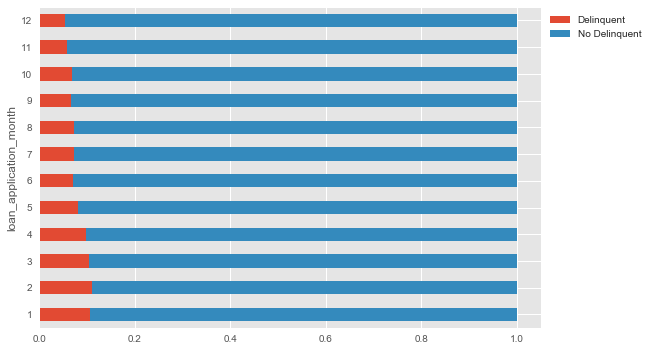

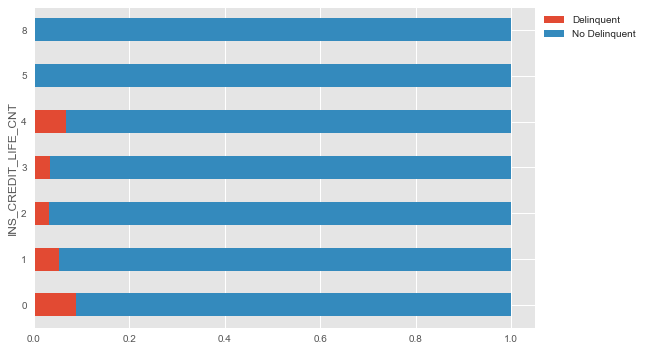

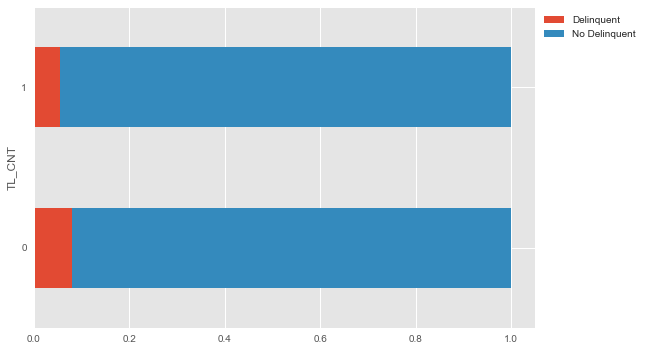

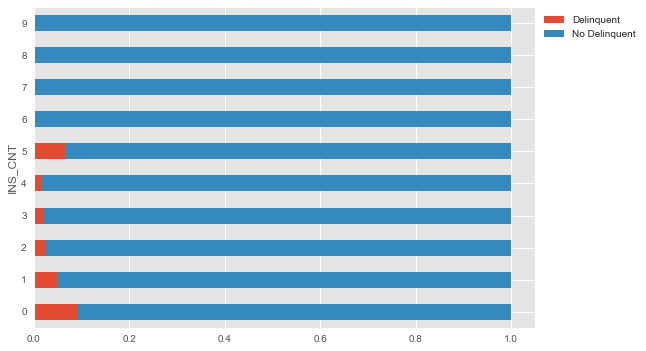

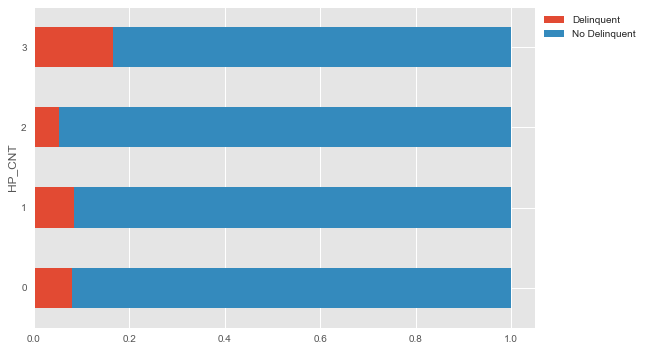

In [208]:
#INS_CREDIT_LIFE_CNT', 'INS_LIFE_CNT', 'INS_CNT
plt.figure(figsize=(5,5))
SA_CNT = pd.crosstab(data['SA_CNT'],data['DELQ_FLG'], normalize=0)  
CC_CNT = pd.crosstab(data['CC_CNT'],data['DELQ_FLG'], normalize=0)
HP_CNT = pd.crosstab(data['HP_CNT'],data['DELQ_FLG'], normalize=0)
TL_CNT = pd.crosstab(data['TL_CNT'],data['DELQ_FLG'], normalize=0)
TLi_CNT = pd.crosstab(data['TLi_CNT'],data['DELQ_FLG'], normalize=0)
INS_CREDIT_LIFE_CNT = pd.crosstab(data['INS_CREDIT_LIFE_CNT'],data['DELQ_FLG'], normalize=0)
INS_LIFE_CNT = pd.crosstab(data['TL_CNT'],data['DELQ_FLG'], normalize=0)
INS_CNT = pd.crosstab(data['INS_CNT'],data['DELQ_FLG'], normalize=0)


plt.figure(figsize=(5,5))
loan_application_month=pd.crosstab(data['loan_application_month'],data['DELQ_FLG'], normalize=0)
loan_application_month.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.figure(figsize=(5,5))
INS_CREDIT_LIFE_CNT.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.figure(figsize=(5,5))
INS_LIFE_CNT.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.figure(figsize=(5,5))
INS_CNT.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


plt.figure(figsize=(5,5))
HP_CNT.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()


# Barplot for State Variable

Text(0.5,1,'Barplot For State')

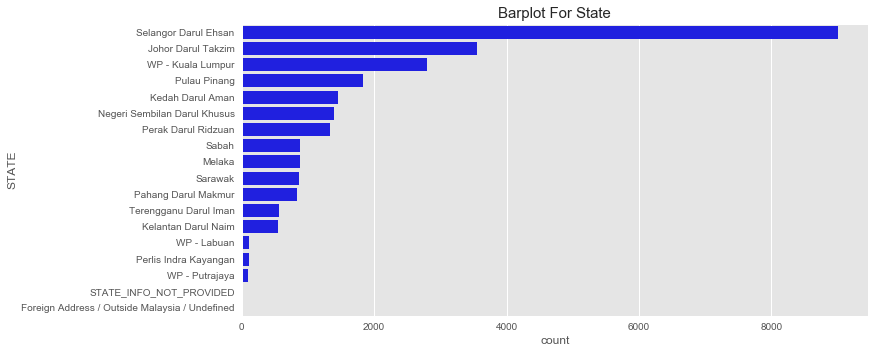

In [201]:
f=plt.figure(figsize=(10,5))
sns.countplot(y='STATE', data=data, 
              order = data['STATE'].value_counts().index,
#              hue='DELQ_FLG',
              color='BLUE'
             ) 
# Rotate x-labels
plt.xticks(rotation=0)
plt.title('Barplot For State', size=15)

# Feature Importance with XGboost Under Sampling 

## Train-Test Split

In [222]:
data=data.dropna()
y=data['DELQ_FLG']
#y = y.map(dict(Y=1, N=0))
X=data.drop(['DELQ_FLG'],1)
X=pd.get_dummies(X)
#X.info()
X.shape

(26315, 156)

## Modelling

In [223]:
from imblearn.under_sampling import RandomUnderSampler 
ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)
from numpy import loadtxt
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X ,y,test_size=0.3, random_state=7)
xgc = XGBClassifier(learning_rate=0.05
                                  ,min_samples_split=275
                                  ,min_samples_leaf=50
                                  ,max_depth=10
                                  ,n_estimators=70
                                  ,max_features='sqrt'
                                  ,subsample=0.8
                                  ,random_state=10)
model= xgc.fit(X_train,y_train)

## Feature Importances

                             importance
feature                                
SA_AVG_BAL                        0.159
loan_application_day              0.139
AGE                               0.100
PREPAID_TXN_AMT_TOTAL_TELCO       0.017
PREPAID_AMT_MTH_4                 0.015
SA_CNT                            0.015
GENDER_Female                     0.015
CNT_MOBILE_PHONE                  0.015
OCC_DESC_NON-EXECUTIVE            0.014
CC_CNT                            0.013


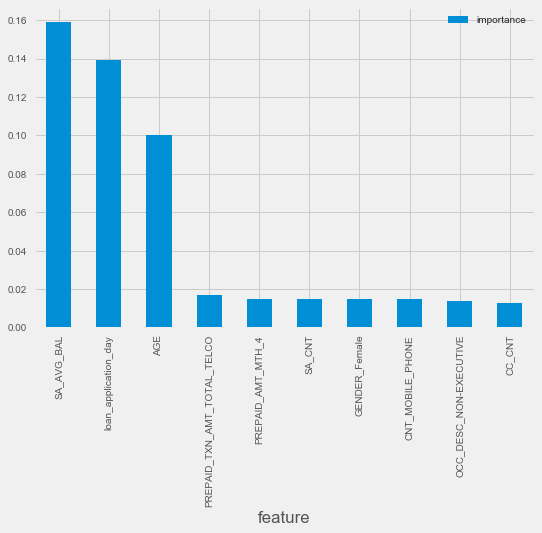

In [224]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances.head(10))
importances.head(10).plot.bar()

# Partial Dependence Plot

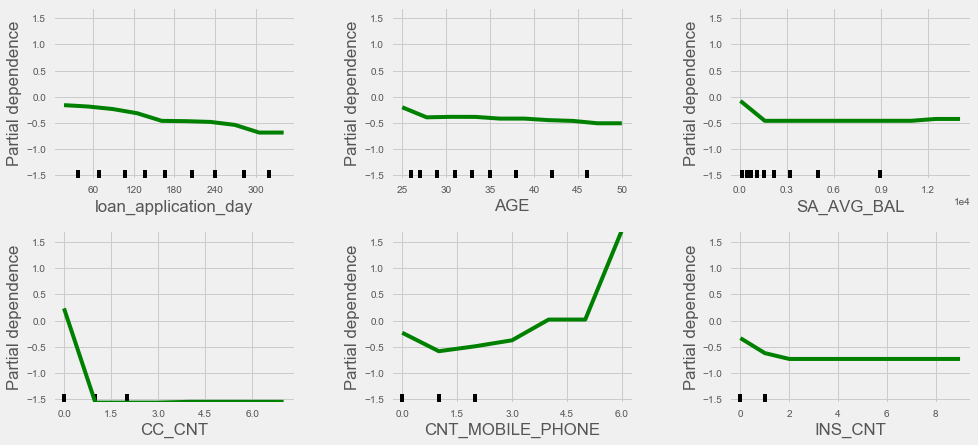

In [227]:
plt.style.use( 'fivethirtyeight')
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
#features=['loan_application_day', 'loan_application_month', 'SA_CNT', 'HP_CNT',
#              'INS_CREDIT_LIFE_CNT', 'INS_LIFE_CNT', 'INS_CNT']
features = features
dependences = ['loan_application_day', 'AGE', 'SA_AVG_BAL',
               'CC_CNT','CNT_MOBILE_PHONE','INS_CNT']
my_model = xgboost()
my_model.fit(X_train[features], y_train)
fig, ax = ensemble.partial_dependence.plot_partial_dependence(my_model, X_train[features], dependences, 
                                                              feature_names=features,grid_resolution=10, 
                                                              figsize=(15,10) )

We can get the pattern from the variables based on Target variable by the plot

In [216]:
features=['AGE', 'DEPENDENT_CNT', 'SA_AVG_BAL', 'SA_CNT', 'CC_CNT', 'HP_CNT', 'TL_CNT', 'TLi_CNT', 'INS_CREDIT_LIFE_CNT', 'INS_LIFE_CNT', 'INS_CNT', 'PREPAID_AMT_MTH_1', 'PREPAID_AMT_MTH_2', 'PREPAID_AMT_MTH_3', 'PREPAID_AMT_MTH_4', 'PREPAID_AMT_MTH_5', 'PREPAID_AMT_MTH_6', 'PREPAID_CNT_MTH_1', 'PREPAID_CNT_MTH_2', 'PREPAID_CNT_MTH_3', 'PREPAID_CNT_MTH_4', 'PREPAID_CNT_MTH_5', 'PREPAID_CNT_MTH_6', 'POSTPAID_AMT_MTH_1', 'POSTPAID_AMT_MTH_2', 'POSTPAID_AMT_MTH_3', 'POSTPAID_AMT_MTH_4', 'POSTPAID_AMT_MTH_5', 'POSTPAID_AMT_MTH_6', 'POSTPAID_CNT_MTH_1', 'POSTPAID_CNT_MTH_2', 'POSTPAID_CNT_MTH_3', 'POSTPAID_CNT_MTH_4', 'POSTPAID_CNT_MTH_5', 'POSTPAID_CNT_MTH_6', 'TXN_AMT_MTH_1_TRANS', 'TXN_AMT_MTH_2_TRANS', 'TXN_AMT_MTH_3_TRANS', 'TXN_AMT_MTH_4_TRANS', 'TXN_AMT_MTH_5_TRANS', 'TXN_AMT_MTH_6_TRANS', 'TXN_CNT_MTH_1_TRANS', 'TXN_CNT_MTH_2_TRANS', 'TXN_CNT_MTH_3_TRANS', 'TXN_CNT_MTH_4_TRANS', 'TXN_CNT_MTH_5_TRANS', 'TXN_CNT_MTH_6_TRANS', 'TXN_AMT_MTH_1_ECO', 'TXN_AMT_MTH_2_ECO', 'TXN_AMT_MTH_3_ECO', 'TXN_AMT_MTH_4_ECO', 'TXN_AMT_MTH_5_ECO', 'TXN_AMT_MTH_6_ECO', 'TXN_CNT_MTH_1_ECO', 'TXN_CNT_MTH_2_ECO', 'TXN_CNT_MTH_3_ECO', 'TXN_CNT_MTH_4_ECO', 'TXN_CNT_MTH_5_ECO', 'TXN_CNT_MTH_6_ECO', 'TXN_AMT_MTH_1_TRAVEL', 'TXN_AMT_MTH_2_TRAVEL', 'TXN_AMT_MTH_3_TRAVEL', 'TXN_AMT_MTH_4_TRAVEL', 'TXN_AMT_MTH_5_TRAVEL', 'TXN_AMT_MTH_6_TRAVEL', 'TXN_CNT_MTH_1_TRAVEL', 'TXN_CNT_MTH_2_TRAVEL', 'TXN_CNT_MTH_3_TRAVEL', 'TXN_CNT_MTH_4_TRAVEL', 'TXN_CNT_MTH_5_TRAVEL', 'TXN_CNT_MTH_6_TRAVEL', 'loan_application_day', 'loan_application_month','CNT_MOBILE_PHONE']